In [3]:
original_df:pd.DataFrame = pd.read_csv("../data/raw/TMDB_movie_dataset_v11.csv")

In [4]:
df = original_df.copy()
df.head()

,id,title,vote_average,vote_count,status,release_date,revenue,runtime,adult,backdrop_path,...,original_title,overview,popularity,poster_path,tagline,genres,production_companies,production_countries,spoken_languages,keywords
0,27205,Inception,8.364,34495,Released,2010-07-15,825532764,148,False,/8ZTVqvKDQ8emSGUEMjsS4yHAwrp.jpg,...,Inception,"Cobb, a skilled thief who commits corporate es...",83.952,/oYuLEt3zVCKq57qu2F8dT7NIa6f.jpg,Your mind is the scene of the crime.,"Action, Science Fiction, Adventure","Legendary Pictures, Syncopy, Warner Bros. Pict...","United Kingdom, United States of America","English, French, Japanese, Swahili","rescue, mission, dream, airplane, paris, franc..."
1,157336,Interstellar,8.417,32571,Released,2014-11-05,701729206,169,False,/pbrkL804c8yAv3zBZR4QPEafpAR.jpg,...,Interstellar,The adventures of a group of explorers who mak...,140.241,/gEU2QniE6E77NI6lCU6MxlNBvIx.jpg,Mankind was born on Earth. It was never meant ...,"Adventure, Drama, Science Fiction","Legendary Pictures, Syncopy, Lynda Obst Produc...","United Kingdom, United States of America",English,"rescue, future, spacecraft, race against time,..."
2,155,The Dark Knight,8.512,30619,Released,2008-07-16,1004558444,152,False,/nMKdUUepR0i5zn0y1T4CsSB5chy.jpg,...,The Dark Knight,Batman raises the stakes in his war on crime. ...,130.643,/qJ2tW6WMUDux911r6m7haRef0WH.jpg,Welcome to a world without rules.,"Drama, Action, Crime, Thriller","DC Comics, Legendary Pictures, Syncopy, Isobel...","United Kingdom, United States of America","English, Mandarin","joker, sadism, chaos, secret identity, crime f..."
3,19995,Avatar,7.573,29815,Released,2009-12-15,2923706026,162,False,/vL5LR6WdxWPjLPFRLe133jXWsh5.jpg,...,Avatar,"In the 22nd century, a paraplegic Marine is di...",79.932,/kyeqWdyUXW608qlYkRqosgbbJyK.jpg,Enter the world of Pandora.,"Action, Adventure, Fantasy, Science Fiction","Dune Entertainment, Lightstorm Entertainment, ...","United States of America, United Kingdom","English, Spanish","future, society, culture clash, space travel, ..."
4,24428,The Avengers,7.710,29166,Released,2012-04-25,1518815515,143,False,/9BBTo63ANSmhC4e6r62OJFuK2GL.jpg,...,The Avengers,When an unexpected enemy emerges and threatens...,98.082,/RYMX2wcKCBAr24UyPD7xwmjaTn.jpg,Some assembly required.,"Science Fiction, Action, Adventure",Marvel Studios,United States of America,"English, Hindi, Russian","new york city, superhero, shield, based on com..."


In [7]:
print(f"Columnas: {df.shape[1]} \nFilas: {df.shape[0]} \nNull values: {df.isnull().sum().sum()} \nDuplicated Values: {df.duplicated().sum()}")
print("="*20)
df.info()

Columnas: 24 
Filas: 1264807 
Null values: 8063555 
Duplicated Values: 375
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1264807 entries, 0 to 1264806
Data columns (total 24 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   id                    1264807 non-null  int64  
 1   title                 1264794 non-null  object 
 2   vote_average          1264807 non-null  float64
 3   vote_count            1264807 non-null  int64  
 4   status                1264807 non-null  object 
 5   release_date          1021233 non-null  object 
 6   revenue               1264807 non-null  int64  
 7   runtime               1264807 non-null  int64  
 8   adult                 1264807 non-null  bool   
 9   backdrop_path         326045 non-null   object 
 10  budget                1264807 non-null  int64  
 11  homepage              132027 non-null   object 
 12  imdb_id               633013 non-null   object 
 13  original_lan

 ## Datos nulos y duplicados

In [ ]:
# Vemos en que columnas hay datos nulos
features_null_values = df.loc[:, df.isnull().sum() > 0].columns.tolist()
for feature in features_null_values:
  null_values = df[feature].isnull().sum()
  percentage = round((null_values/df.shape[0]) * 100, 3)
  print(f"La columna {feature} tiene {null_values} valores nulos. Es el {percentage:.2f}% de los datos.")

print(f"El dataset tiene {df.duplicated().sum()} datos duplicados")

La columna title tiene 13 valores nulos. Es el 0.001% de los datos.
La columna release_date tiene 243574 valores nulos. Es el 19.258% de los datos.
La columna backdrop_path tiene 938762 valores nulos. Es el 74.222% de los datos.
La columna homepage tiene 1132780 valores nulos. Es el 89.561% de los datos.
La columna imdb_id tiene 631794 valores nulos. Es el 49.952% de los datos.
La columna original_title tiene 13 valores nulos. Es el 0.001% de los datos.
La columna overview tiene 274815 valores nulos. Es el 21.728% de los datos.
La columna poster_path tiene 423437 valores nulos. Es el 33.478% de los datos.
La columna tagline tiene 1087818 valores nulos. Es el 86.007% de los datos.
La columna genres tiene 532255 valores nulos. Es el 42.082% de los datos.
La columna production_companies tiene 709296 valores nulos. Es el 56.079% de los datos.
La columna production_countries tiene 587317 valores nulos. Es el 46.435% de los datos.
La columna spoken_languages tiene 564262 valores nulos. Es el

Eliminamos los datos duplicados

In [10]:
df = df.drop_duplicates()

# Análisis univariado

## Release date

In [7]:
# Lo convertimos a datetime para trabajarlo más comodamente.
df['release_date'] = pd.to_datetime(df["release_date"])

In [10]:
def date_separation(dataframe:pd.DataFrame, date_name:str) -> None:
    dataframe["year"] = dataframe[date_name].dt.year
    dataframe["month"] = dataframe[date_name].dt.month
    dataframe["day"] = dataframe[date_name].dt.day

In [11]:
date_separation(df, "release_date")

<Axes: title={'center': 'Tendencia de lanzamientos por año'}, xlabel='release_date', ylabel='Cantidad de peliculas'>

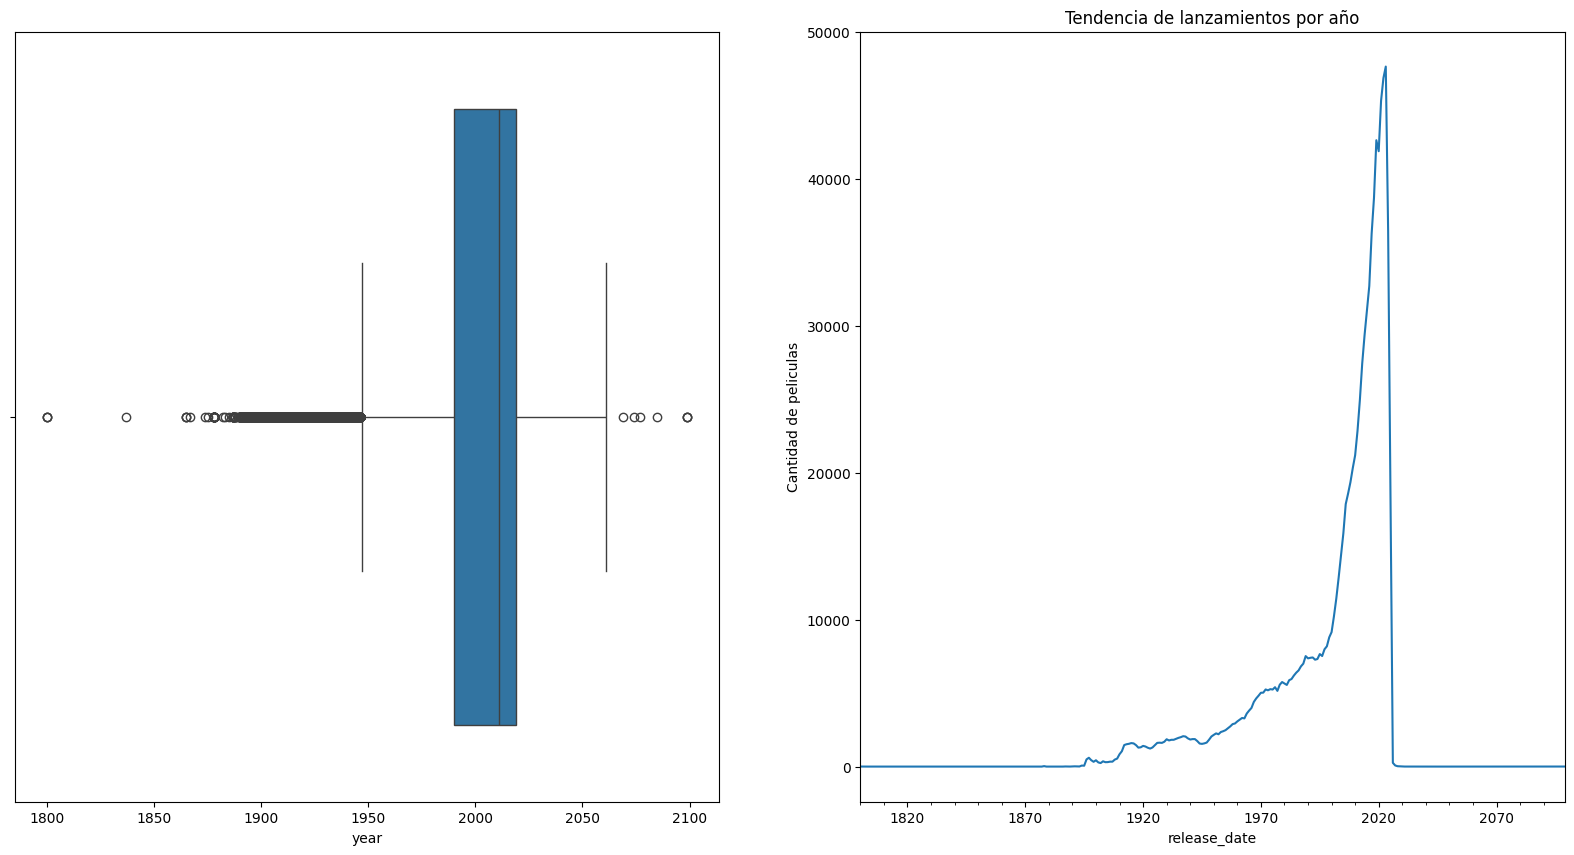

In [59]:
fig, axes = plt.subplots(1, 2, figsize=(20, 10))

sns.boxplot(
    data=df,
    x="year",
    ax=axes[0]
)

# Esto permite analizar la tendencia por año. Cuantas películas se lanzaron ese año. 
# df.set_index convierte una columna en el nuevo indice
# resample agrupa los datos por fecha. Puede ser YE, M, W, Q

df.set_index('release_date').resample('YE').size().plot(title='Tendencia de lanzamientos por año', ylabel="Cantidad de peliculas", ax=axes[1])

Vamos a analizar los outliers por año.

In [33]:
def extract_outliers(dataframe:pd.DataFrame, feature:str) -> None:

    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1

    li = Q1 - 1.5 * IQR
    ls = Q1 + 1.5 * IQR

    outliers = df[(df[feature] < li) | (df[feature] > ls)]
    no_outliers = df[(df[feature] >= li) & (df[feature] <= ls)]
    
    return outliers, no_outliers

In [34]:
outliers_year, no_outliers_year = extract_outliers(df, "year")

<Axes: xlabel='year'>

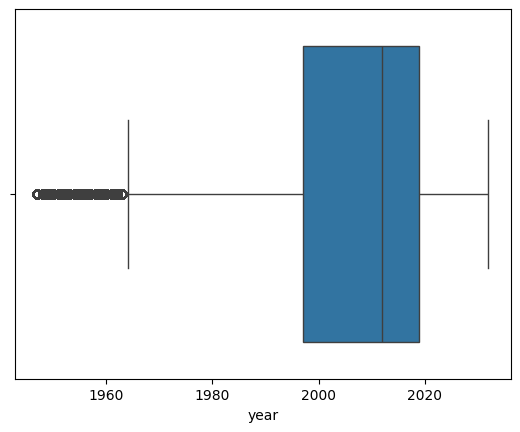

In [36]:
sns.boxplot(
    data=no_outliers_year,
    x='year'
)